<a href="https://colab.research.google.com/github/molly72/Project/blob/main/LSTM_4_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['TSLA', 'GOOG', 'AAPL', 'MSFT']

# Set up End and Start times for data grab
tech_list = ['TSLA', 'GOOG', 'AAPL', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [TSLA, GOOG, AAPL, MSFT]
company_name = ["TESLA", "GOOGLE", "APPLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-24,345.850006,346.920013,342.309998,345.109985,345.109985,26678100,MICROSOFT
2023-07-25,347.109985,351.890015,345.070007,350.980011,350.980011,41637700,MICROSOFT
2023-07-26,341.440002,344.670013,333.109985,337.769989,337.769989,58383700,MICROSOFT
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300,MICROSOFT
2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28484900,MICROSOFT
2023-07-31,336.920013,337.700012,333.359985,335.920013,335.920013,25446000,MICROSOFT
2023-08-01,335.190002,338.540009,333.700012,336.339996,336.339996,18311900,MICROSOFT
2023-08-02,333.630005,333.630005,326.359985,327.500000,327.500000,27761300,MICROSOFT
2023-08-03,326.000000,329.880005,325.950012,326.660004,326.660004,18253700,MICROSOFT


In [ ]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,212.485737,217.013745,207.431315,212.238619,212.238619,1.252183e+08
std,52.640400,53.012316,51.954469,52.338630,52.338630,4.897487e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504997,178.474998,178.474998,8.761210e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.203321e+08
75%,260.385010,265.735001,255.550003,260.279999,260.279999,1.599710e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-05 to 2023-08-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


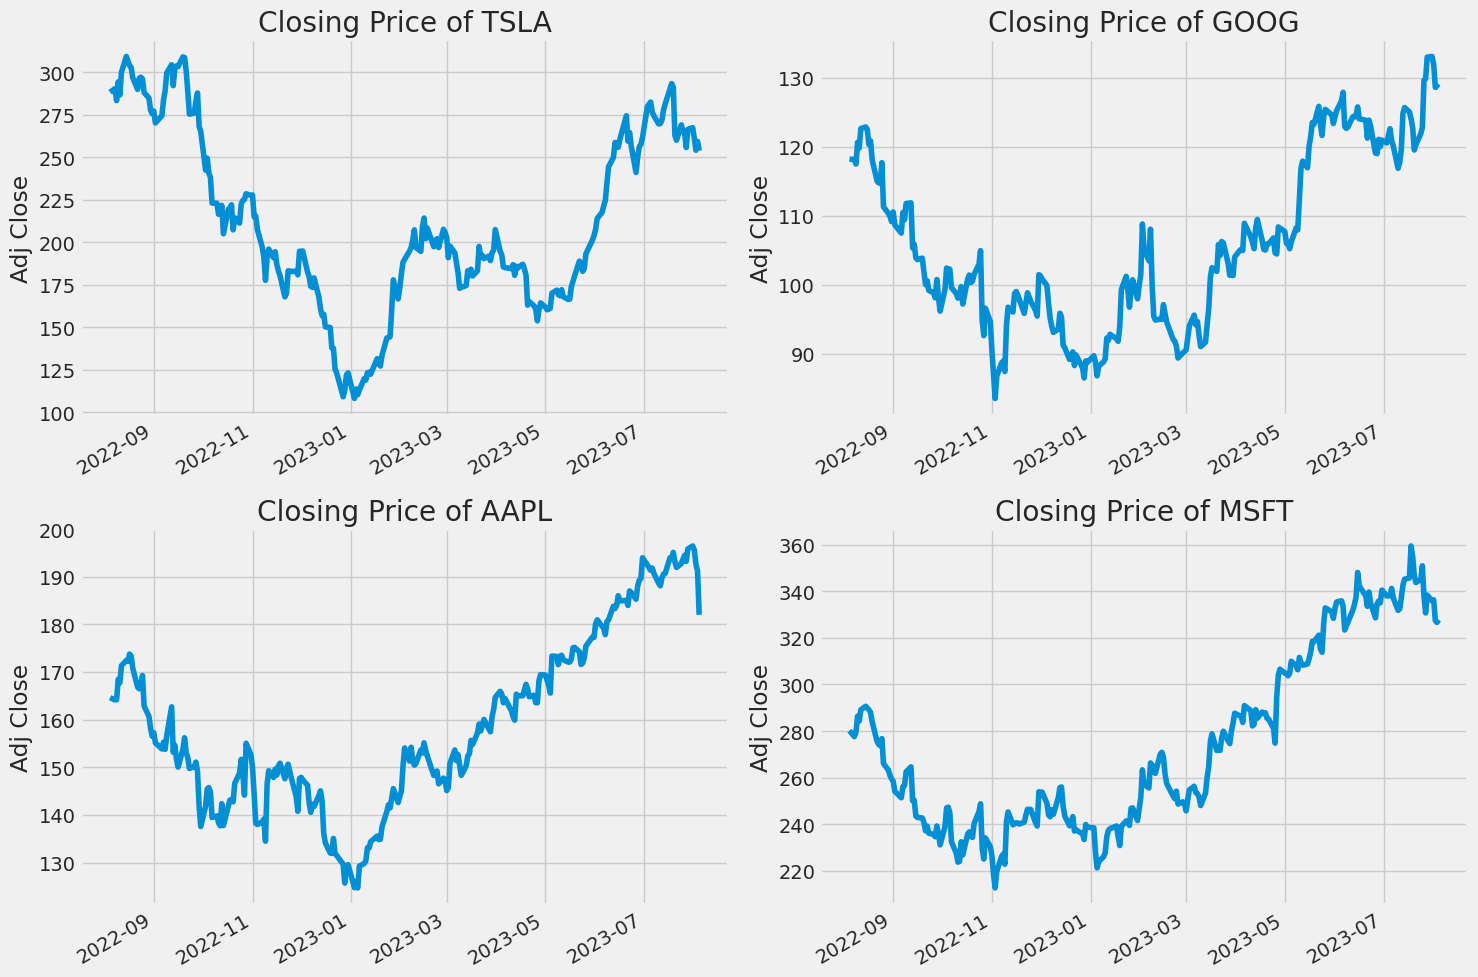

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

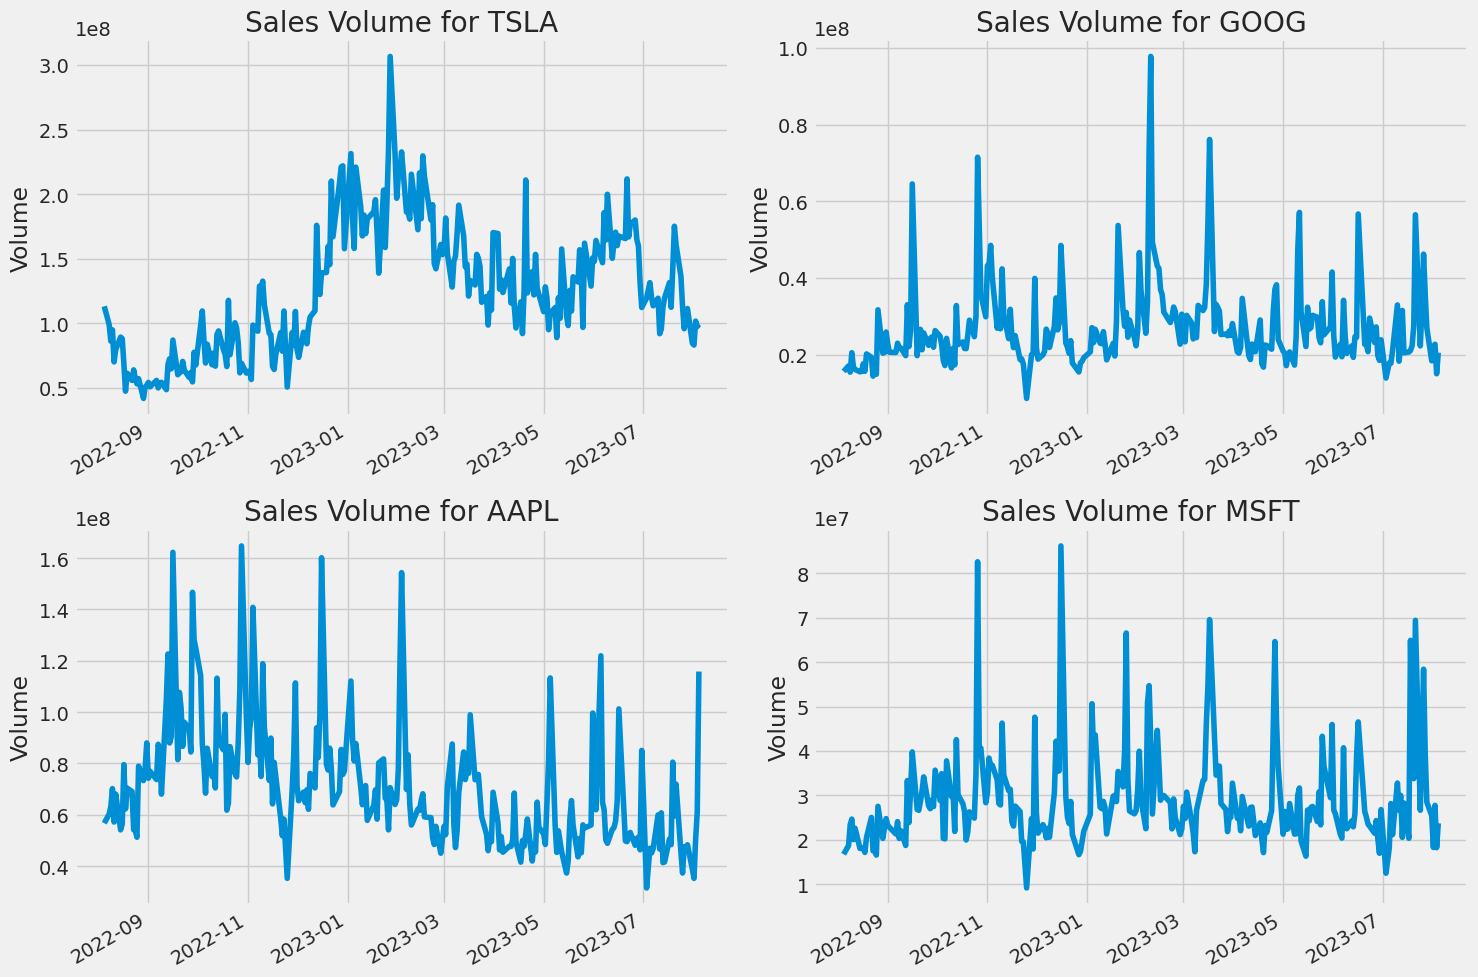

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

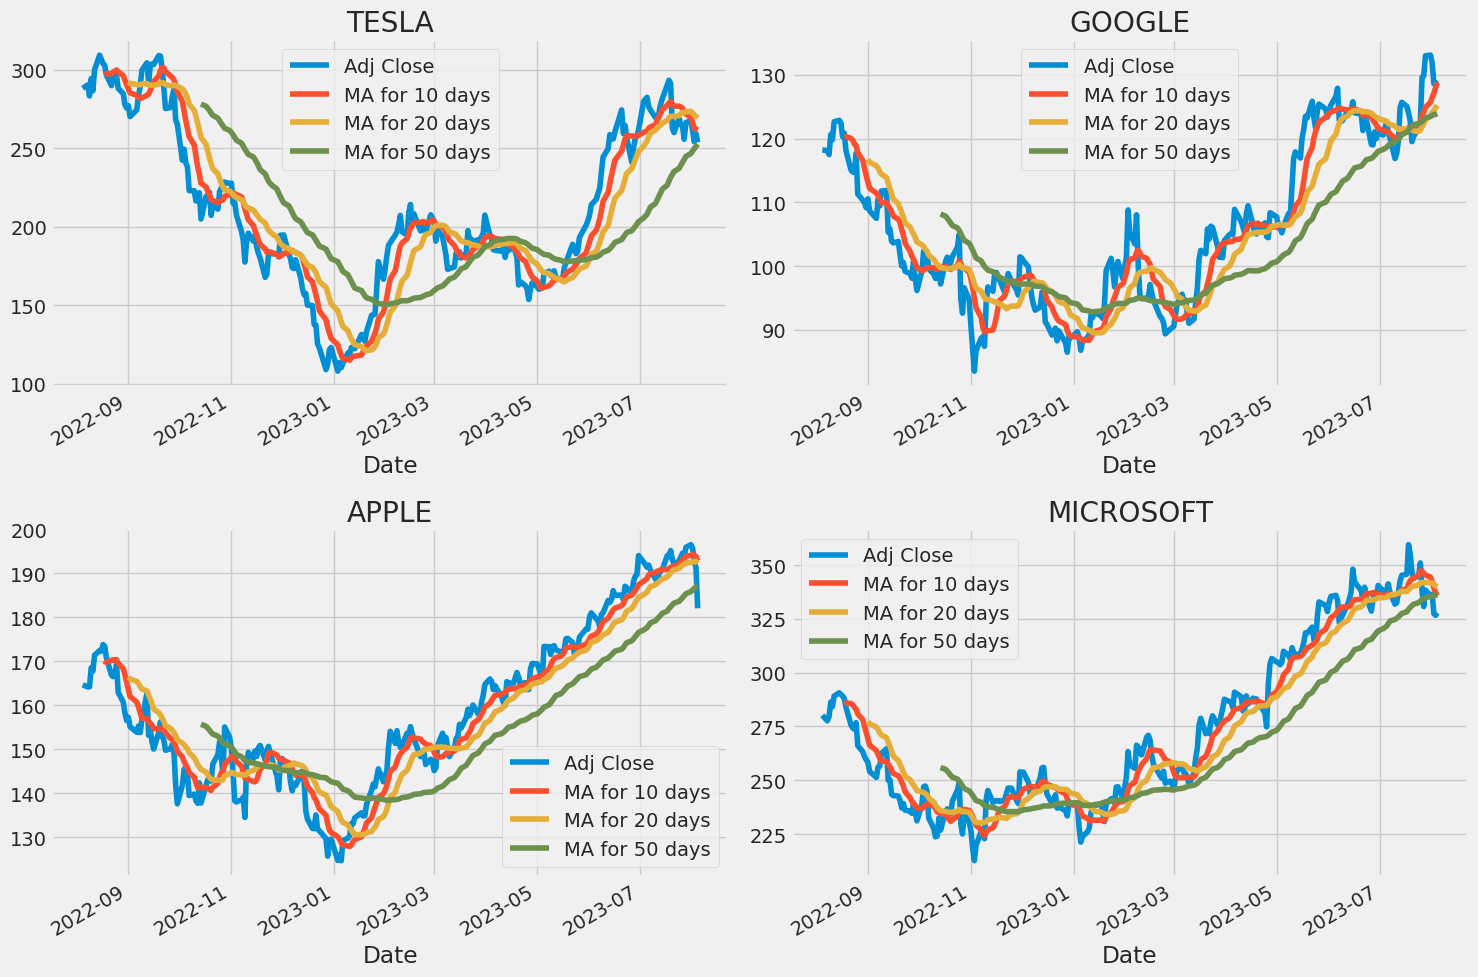

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TESLA')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('APPLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MICROSOFT')


fig.tight_layout()

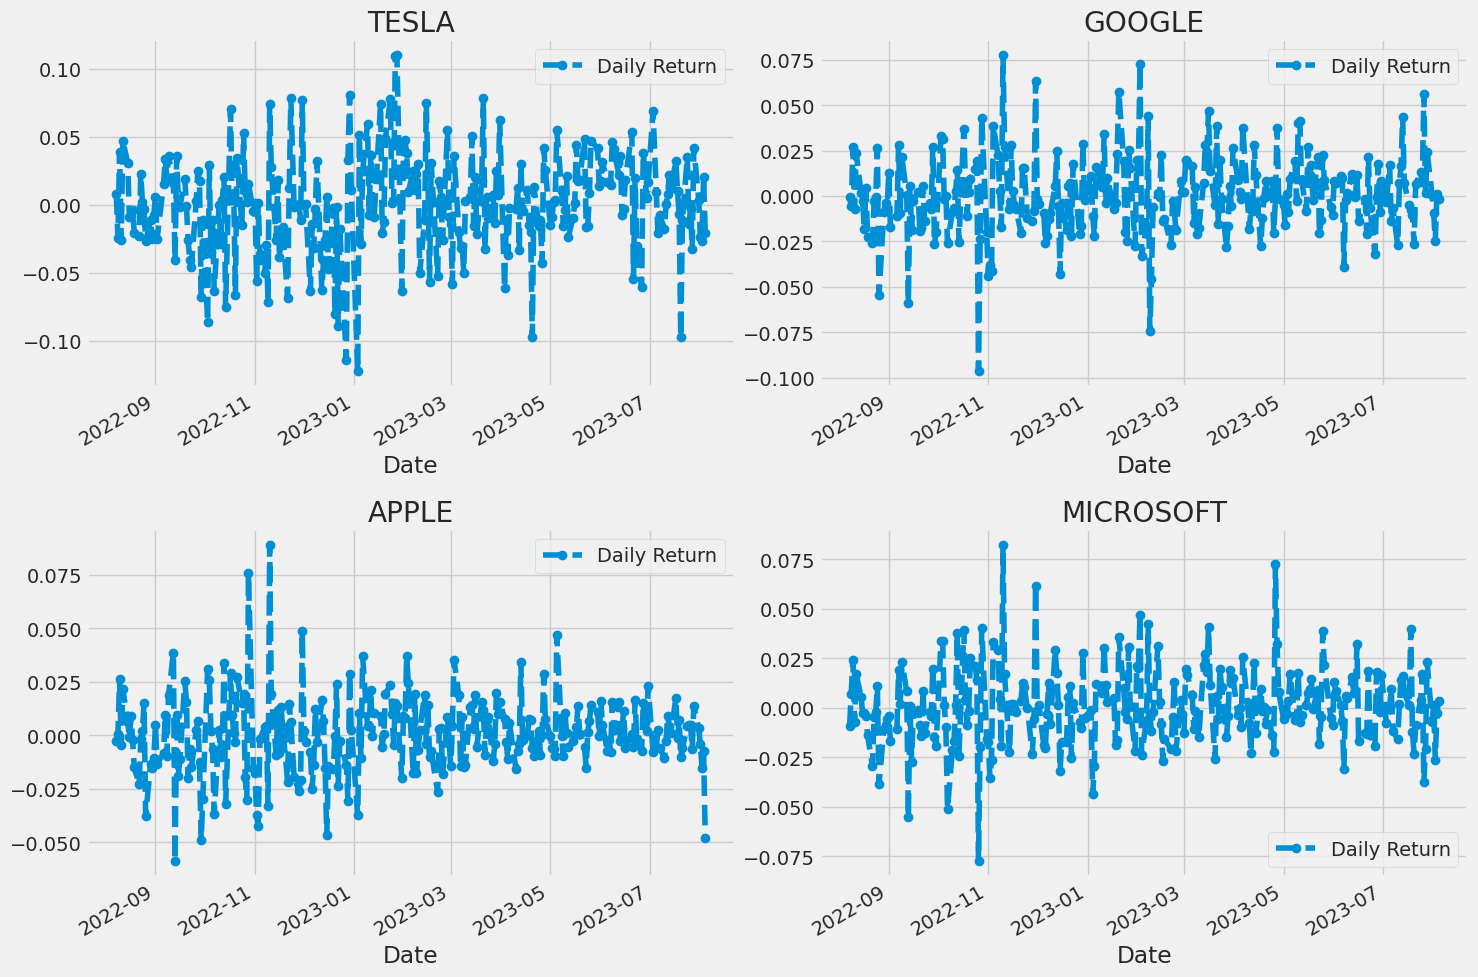

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TESLA')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

AAPL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('APPLE')

MSFT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('MICROSOFT')

fig.tight_layout()

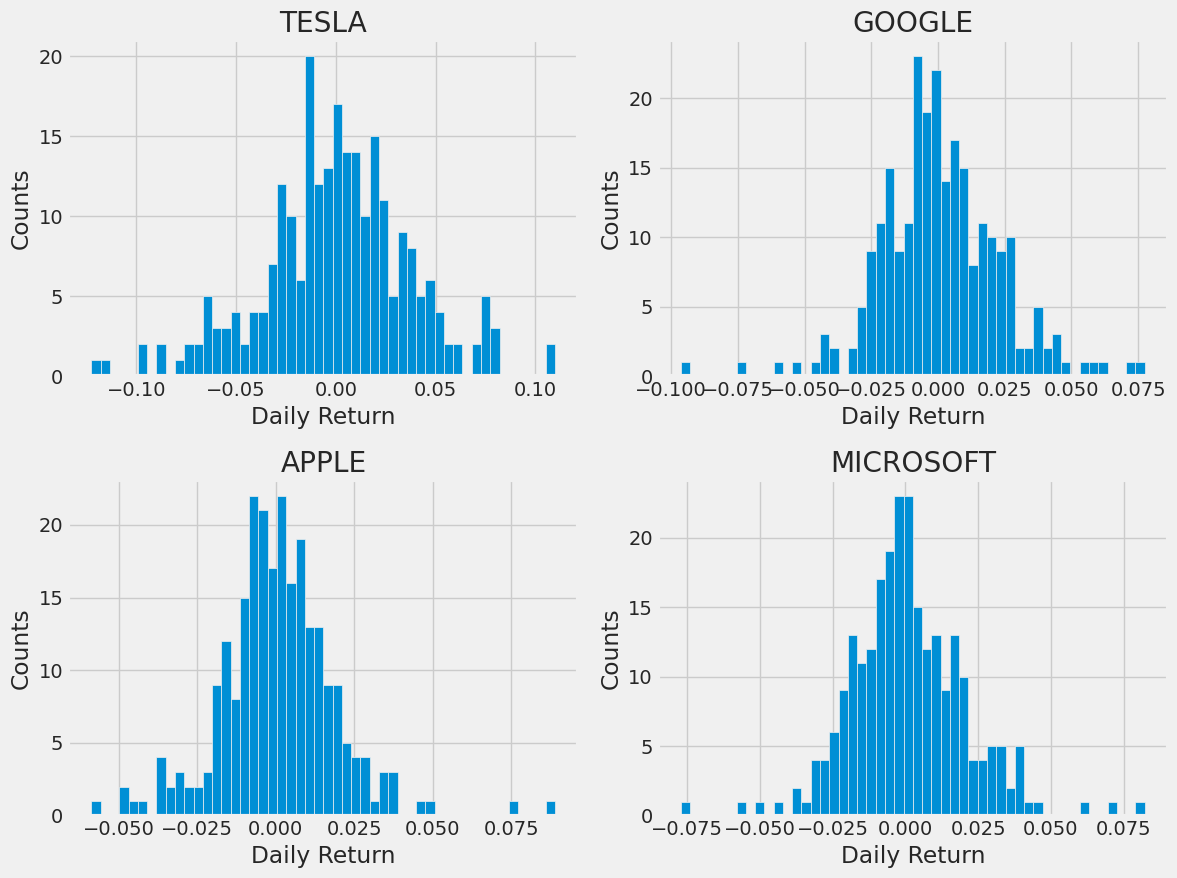

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,GOOG,MSFT,TSLA
Date,,,,
2022-08-05,NaN,NaN,NaN,NaN
2022-08-08,-0.002903,-0.000677,-0.009155,0.007819
2022-08-09,0.000303,-0.005417,0.007063,-0.024413
2022-08-10,0.026195,0.026809,0.024300,0.038906
2022-08-11,-0.004432,-0.006879,-0.007401,-0.026249


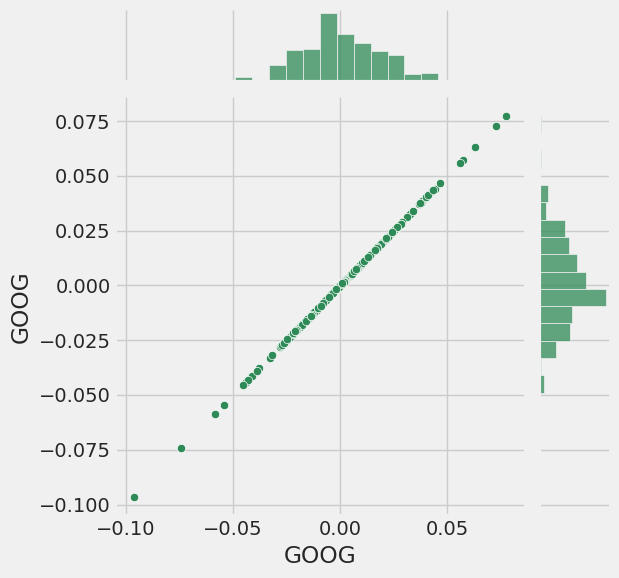

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

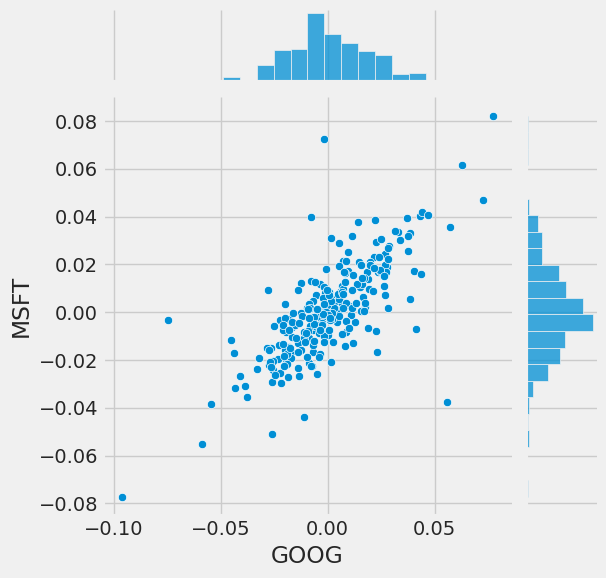

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

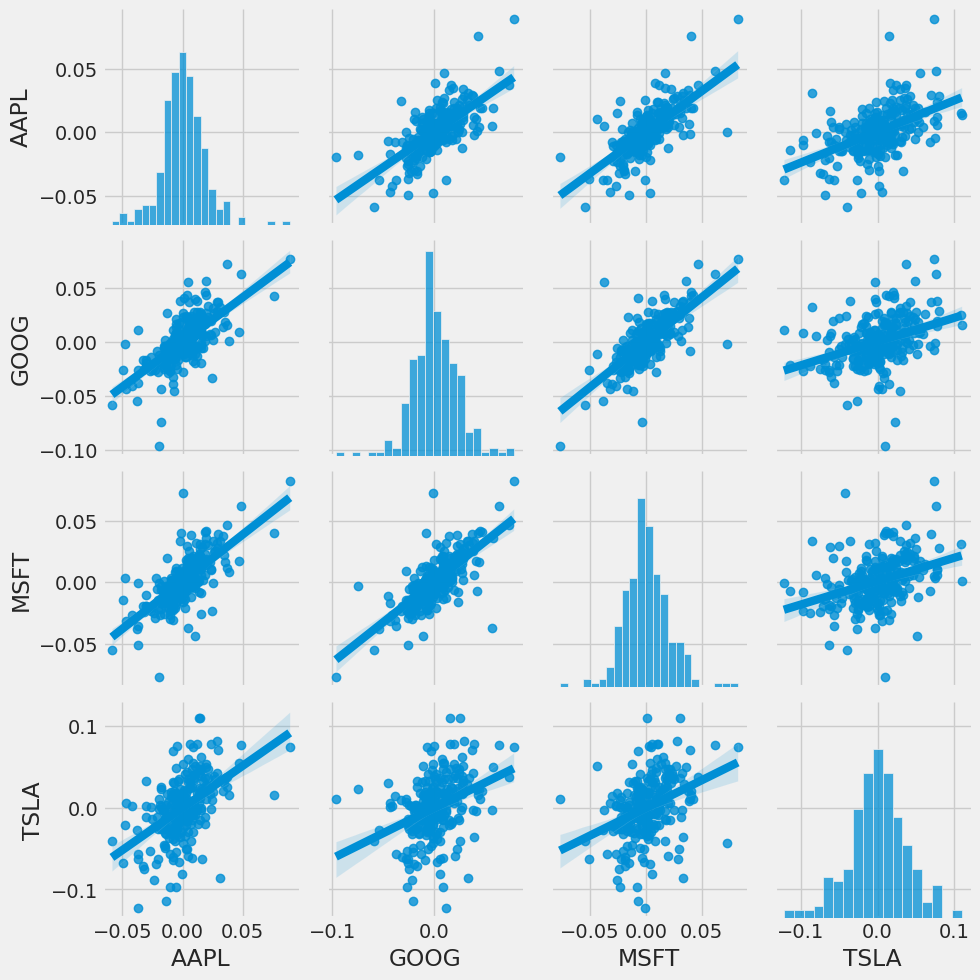

In [ ]:
sns.pairplot(tech_rets, kind='reg')

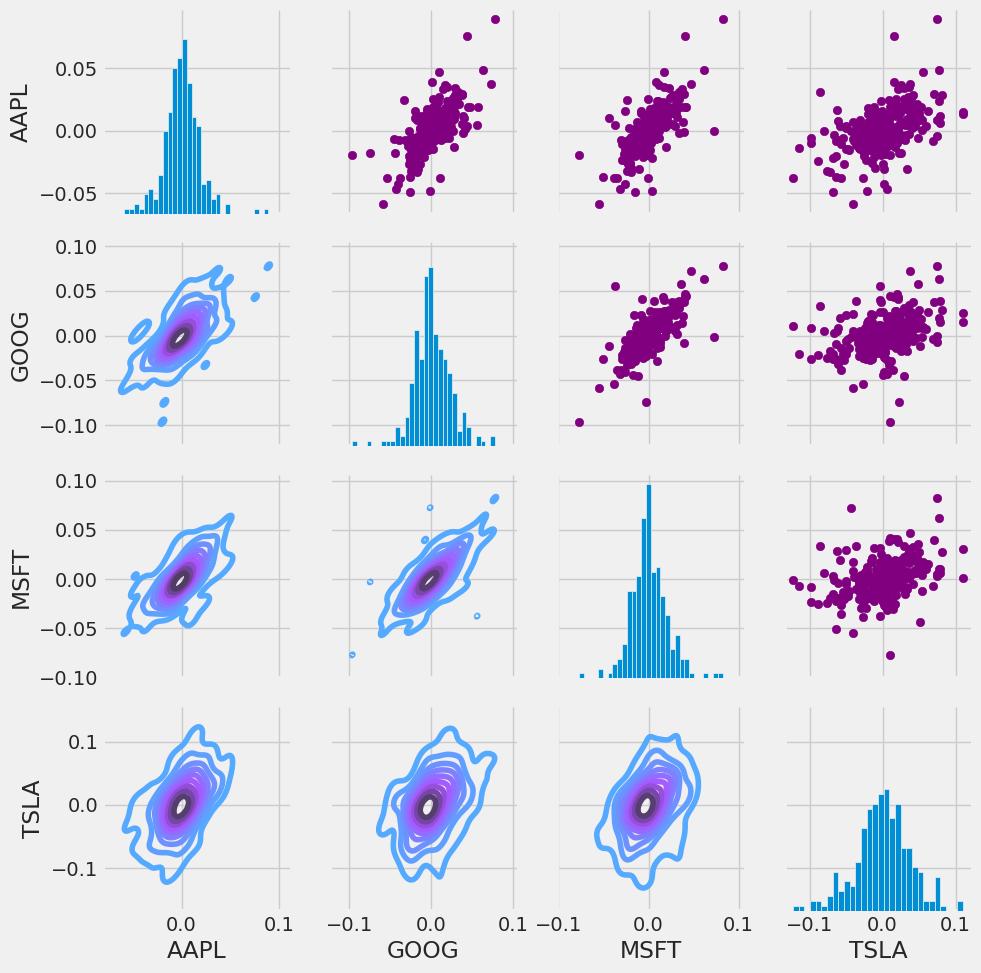

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

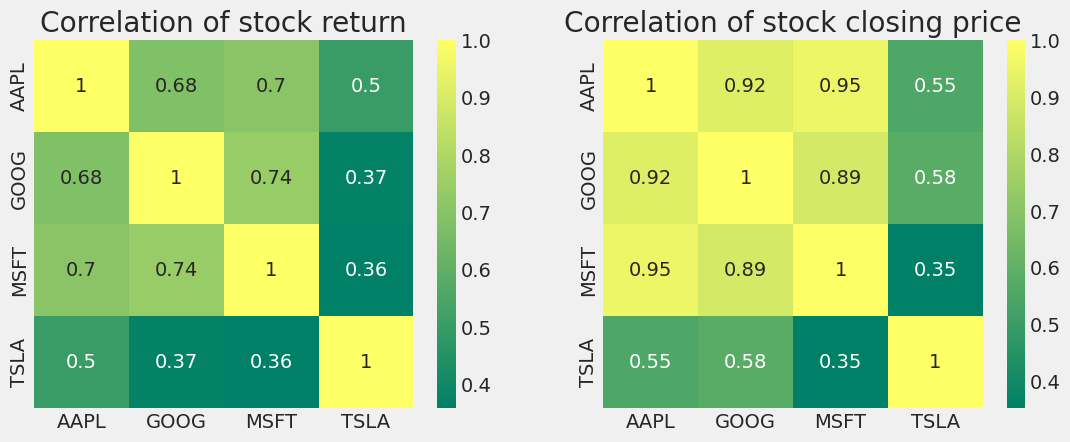

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

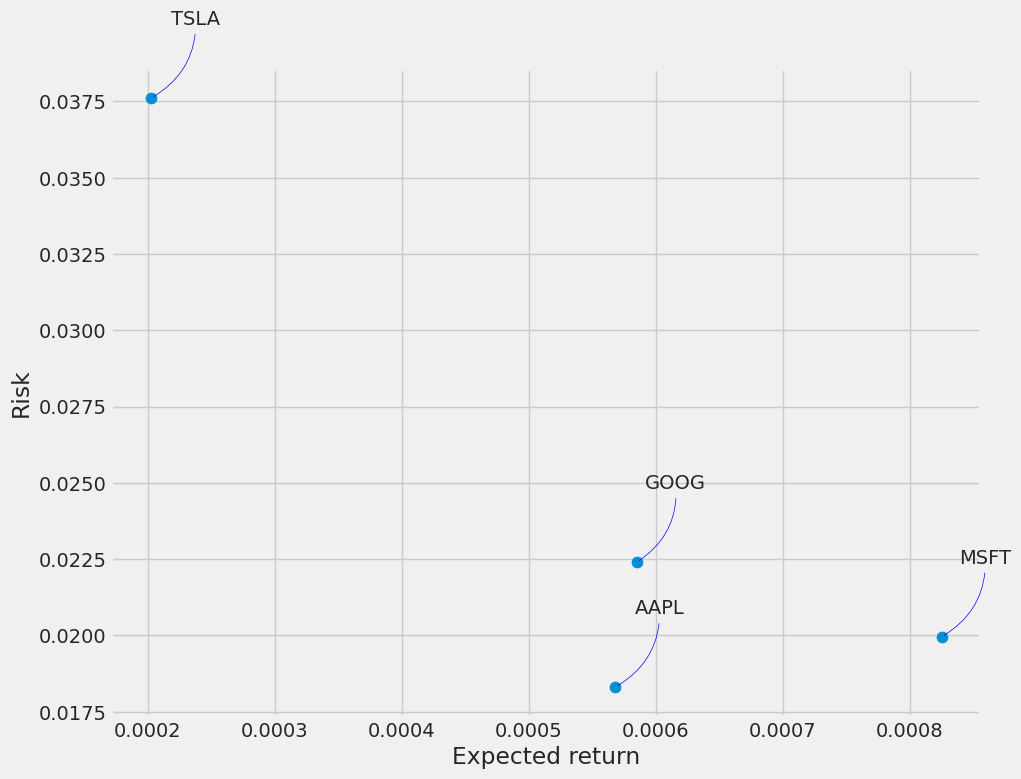

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482930,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550010,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821993,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801659,394024400
...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300


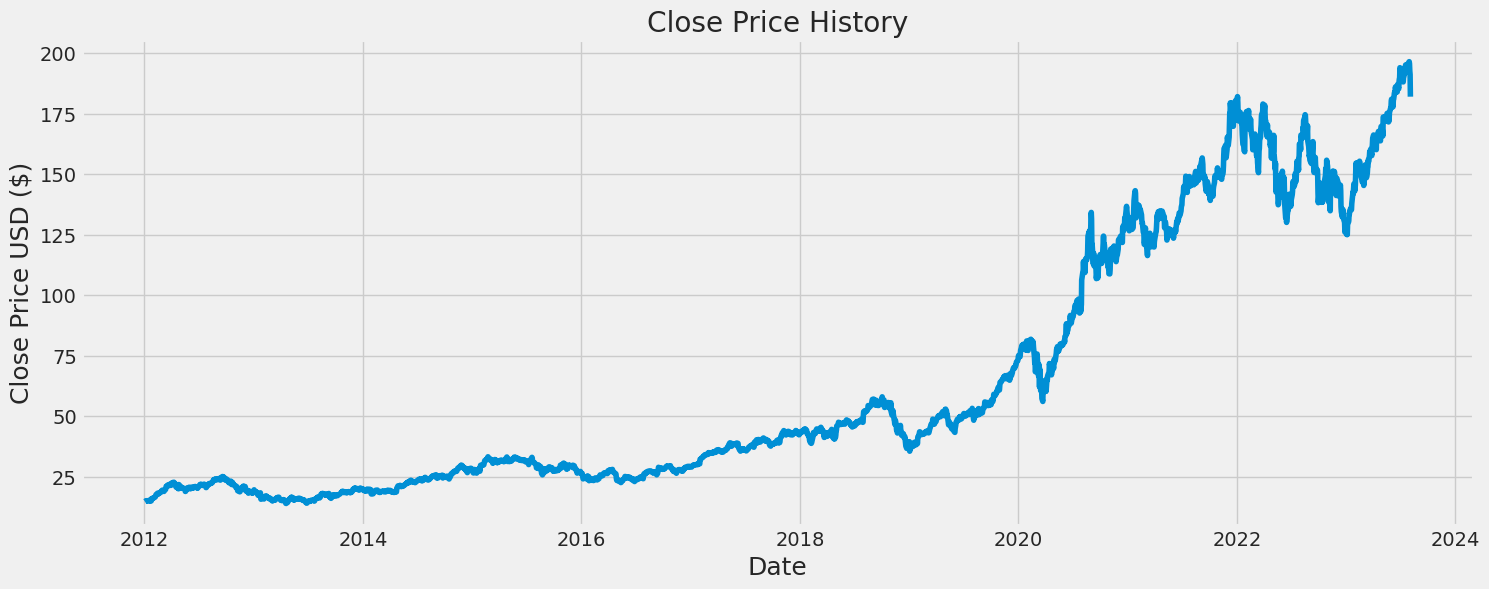

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2771

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.97879484],
       [0.9710689 ],
       [0.92076825]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2711/2711 [==============================] - 113s 40ms/step - loss: 0.0012


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 38ms/step


10.615018375125807

<ipython-input-28-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


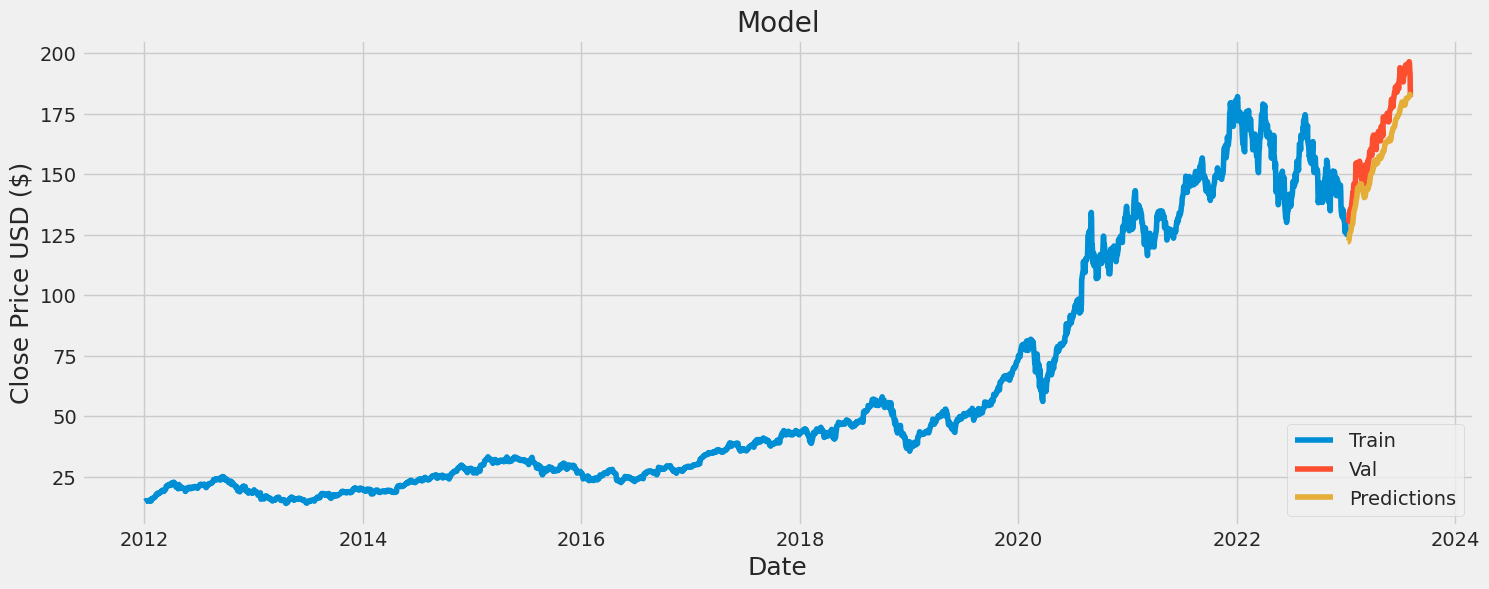

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2023-01-06,129.619995,122.052719
2023-01-09,130.149994,122.106804
2023-01-10,130.729996,122.585144
2023-01-11,133.490005,123.263374
2023-01-12,133.410004,124.347313
...,...,...
2023-07-31,196.449997,182.024094
2023-08-01,195.610001,182.581009
2023-08-02,192.580002,182.962509


import numpy as np
from google.colab import autoviz
df_5906303721753896471 = autoviz.get_df('df_5906303721753896471')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5906303721753896471, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5906303721753896471 = autoviz.get_df('df_5906303721753896471')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5906303721753896471, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5906303721753896471 = autoviz.get_df('df_5906303721753896471')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5906303721753896471, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5906303721753896471 = autoviz.get_df('df_5906303721753896471')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5906303721753896471, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5906303721753896471 = autoviz.get_df('df_5906303721753896471')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5906303721753896471, *[[['Close', 'Predictions']]], **{})
chart